In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:56<00:00, 22.6MB/s]
100% 1.06G/1.06G [00:56<00:00, 20.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Input
from keras.callbacks import EarlyStopping

In [ ]:
train_data=tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    image_size=(256,256),
    batch_size=32,
    label_mode='int'
)

test_data=tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    image_size=(256,256),
    batch_size=32,
    label_mode='int'
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(img,label):
    img=tf.cast(img/256. ,tf.float32)
    return img,label


train_data=train_data.map(process)
test_data=test_data.map(process)

In [ ]:
data_agu=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

In [ ]:
def augment(img,label):
    img=data_agu(img)
    return img,label

In [ ]:
train_data=train_data.map(augment)

In [ ]:
model=Sequential()

model.add(Input(shape=(256,256,3)))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,0

 Total params: 178,753 (698.25 KB)

 Trainable params: 178,209 (696.13 KB)

 Non-trainable params: 544 (2.12 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
history=model.fit(train_data, epochs=22,validation_data=(test_data),callbacks=[early_stopping])

Epoch 1/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 384s 585ms/step - accuracy: 0.5142 - loss: 0.7218 - val_accuracy: 0.5622 - val_loss: 0.6846
Epoch 2/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 349s 557ms/step - accuracy: 0.5545 - loss: 0.6853 - val_accuracy: 0.6482 - val_loss: 0.6474
Epoch 3/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 379s 553ms/step - accuracy: 0.6152 - loss: 0.6494 - val_accuracy: 0.6034 - val_loss: 0.6254
Epoch 4/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 387s 562ms/step - accuracy: 0.6647 - loss: 0.6170 - val_accuracy: 0.7154 - val_loss: 0.5789
Epoch 5/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 381s 561ms/step - accuracy: 0.7127 - loss: 0.5856 - val_accuracy: 0.7246 - val_loss: 0.5514
Epoch 6/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 347s 555ms/step - accuracy: 0.7158 - loss: 0.5720 - val_accuracy: 0.6908 - val_loss: 0.5718
Epoch 7/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 386s 562ms/step - accuracy: 0.7436 - loss: 0.5428 - val_accuracy: 0.7600 - val_loss: 0.5002
Epoch 8/22
625/625 ━━━━━━━━━━━━━━━━━━━━ 374s 549ms/step - accuracy: 0.7614 -

In [ ]:
import matplotlib.pyplot as plt

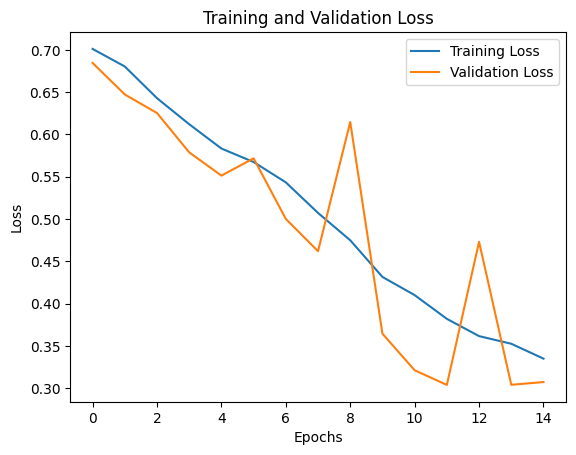

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

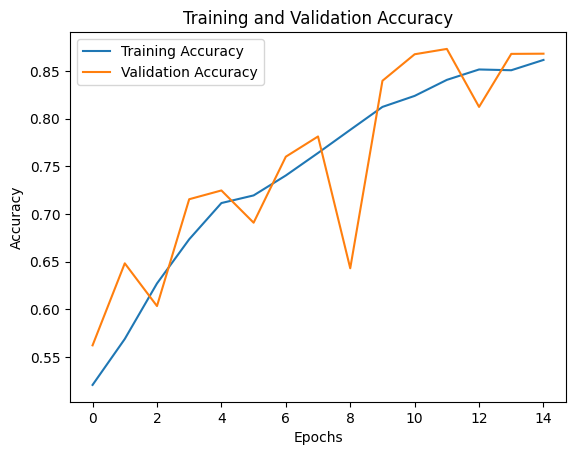

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [ ]:
import cv2

In [ ]:
cat1 = cv2.imread('cat1.jpg')
cat2 = cv2.imread('cat2.jpg')
dog1 = cv2.imread('dog1.jpg')
dog2 = cv2.imread('dog2.jpg')

In [ ]:
cat1=cat1/256.
cat2=cat2/256.
dog1=dog1/256.
dog2=dog2/256.

In [ ]:
cat1 = cv2.resize(cat1, (256, 256))
cat2 = cv2.resize(cat2, (256, 256))
dog1 = cv2.resize(dog1, (256, 256))
dog2 = cv2.resize(dog2, (256, 256))

In [ ]:
cat1_input=cat1.reshape(1,256,256,3)
cat2_input=cat2.reshape(1,256,256,3)
dog1_input=dog1.reshape(1,256,256,3)
dog2_input=dog2.reshape(1,256,256,3)

**prediction**

cat -> 0
dog -> 1

In [ ]:
def cat_dog(prediction):
    if (prediction * 100 > 50.0):
        print(f"prediction : dog ({prediction * 100:.2f}%)")
    else:
        print(f"prediction : cat ({(100 - prediction * 100):.2f}%)")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

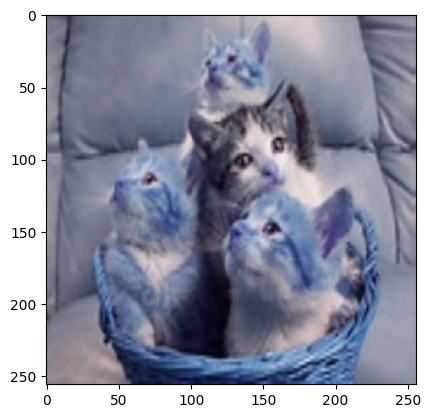


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
prediction : cat (73.54%)


In [ ]:
plt.imshow(cat1)
plt.show()
print()
cat_dog(float(model.predict(cat1_input)[0]))

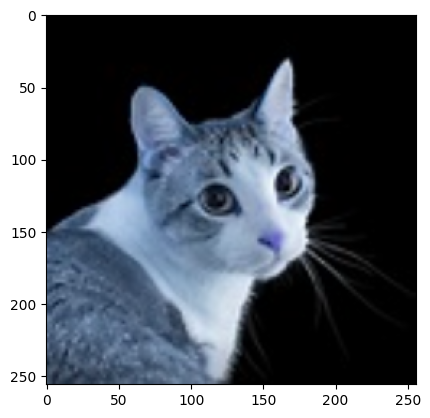

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
prediction : cat (93.88%)


In [ ]:
plt.imshow(cat2)
plt.show()
cat_dog(float(model.predict(cat2_input)))

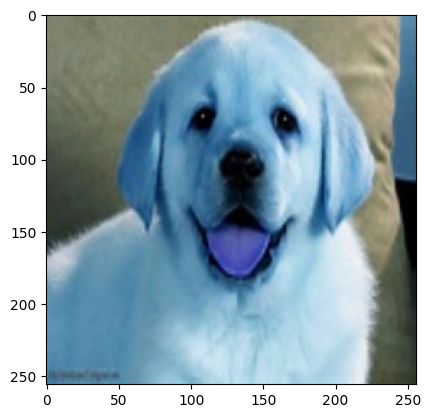

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
prediction : dog (73.31%)


In [ ]:
plt.imshow(dog1)
plt.show()
cat_dog(float(model.predict(dog1_input)))

In [ ]:
cat_dog(float(model.predict(dog1_input)[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
prediction : dog (73.31%)


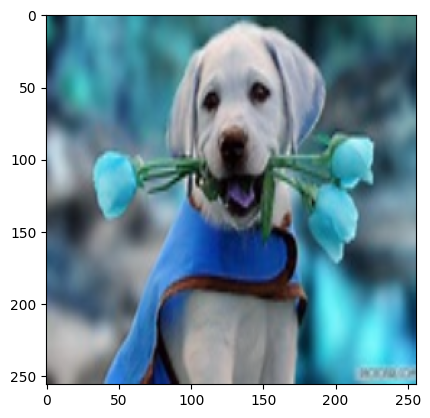

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
prediction : dog (96.05%)


In [ ]:
plt.imshow(dog2)
plt.show()
cat_dog(float(model.predict(dog2_input)))